In [1]:
import nltk

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [7]:
!pip install datasets


In [13]:
from datasets import load_dataset
df = load_dataset("papluca/language-identification")


ModuleNotFoundError: No module named 'datasets'

In [15]:
!where python


C:\Users\HP\anaconda4\python.exe
C:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe
C:\Users\HP\AppData\Local\Microsoft\WindowsApps\python.exe


In [17]:
import sys
!{sys.executable} -m pip install datasets


   ---------------------------------------- 0.0/25.8 MB ? eta -:--:--
    --------------------------------------- 0.5/25.8 MB 2.4 MB/s eta 0:00:11
   - -------------------------------------- 1.0/25.8 MB 2.5 MB/s eta 0:00:10
   -- ------------------------------------- 1.8/25.8 MB 2.8 MB/s eta 0:00:09
   ---- ----------------------------------- 2.6/25.8 MB 3.1 MB/s eta 0:00:08
   ---- ----------------------------------- 3.1/25.8 MB 3.2 MB/s eta 0:00:08
   ----- ---------------------------------- 3.7/25.8 MB 3.0 MB/s eta 0:00:08
   ------ --------------------------------- 4.5/25.8 MB 3.0 MB/s eta 0:00:08
   -------- ------------------------------- 5.2/25.8 MB 3.1 MB/s eta 0:00:07
   --------- ------------------------------ 6.0/25.8 MB 3.2 MB/s eta 0:00:07
   ---------- ----------------------------- 6.6/25.8 MB 3.2 MB/s eta 0:00:06
   ------------ --------------------------- 7.9/25.8 MB 3.4 MB/s eta 0:00:06
   -------------- ------------------------- 9.2/25.8 MB 3.7 MB/s eta 0:00:05
   ---

In [19]:
from datasets import load_dataset
df = load_dataset("papluca/language-identification")


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub\datasets--papluca--language-identification. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administra

In [29]:
train_df = df["train"].to_pandas()
val_df = df["validation"].to_pandas()
test_df = df["test"].to_pandas()

In [31]:
train_df.head()

,labels,text
0,pt,"os chefes de defesa da estónia, letónia, lituâ..."
1,bg,размерът на хоризонталната мрежа може да бъде ...
2,zh,很好，以前从不去评价，不知道浪费了多少积分，现在知道积分可以换钱，就要好好评价了，后来我就把...
3,th,สำหรับ ของเก่า ที่ จริงจัง ลอง honeychurch ...
4,ru,Он увеличил давление .


In [35]:
train_df.labels.unique()

array(['pt', 'bg', 'zh', 'th', 'ru', 'pl', 'ur', 'sw', 'tr', 'es', 'ar',
       'it', 'hi', 'de', 'el', 'nl', 'fr', 'vi', 'en', 'ja'], dtype=object)

In [33]:
train_df.labels.value_counts()

labels
pt    3500
bg    3500
zh    3500
th    3500
ru    3500
pl    3500
ur    3500
sw    3500
tr    3500
es    3500
ar    3500
it    3500
hi    3500
de    3500
el    3500
nl    3500
fr    3500
vi    3500
en    3500
ja    3500
Name: count, dtype: int64

In [37]:
train_df.isnull().sum()

labels    0
text      0
dtype: int64

In [39]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
train_df["text"]=train_df["text"].apply(word_tokenize)

In [45]:
val_df["text"]=val_df["text"].apply(word_tokenize)
test_df["text"]=test_df["text"].apply(word_tokenize)

In [63]:
train_df["text"] = train_df["text"].apply(lambda tokens: ' '.join(tokens))
test_df["text"] = test_df["text"].apply(lambda tokens: ' '.join(tokens))

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [81]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df["text"])
X_test = vectorizer.transform(test_df["text"])


In [83]:
y_train = train_df["labels"]
y_test = test_df["labels"]

In [85]:
from sklearn.model_selection import GridSearchCV

In [87]:
from sklearn.naive_bayes import MultinomialNB

In [89]:
nb=MultinomialNB()


In [107]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0]
}


In [109]:
grid=GridSearchCV(nb,param_grid,cv=5,n_jobs=-1,verbose=1)

In [111]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1.0]}, verbose=1)

In [113]:
print("Best_alpha",grid.best_params_["alpha"])
print("Best_score",grid.best_score_)

Best_alpha 0.1
Best_score 0.9555


In [115]:
y_predict=grid.predict(X_test)

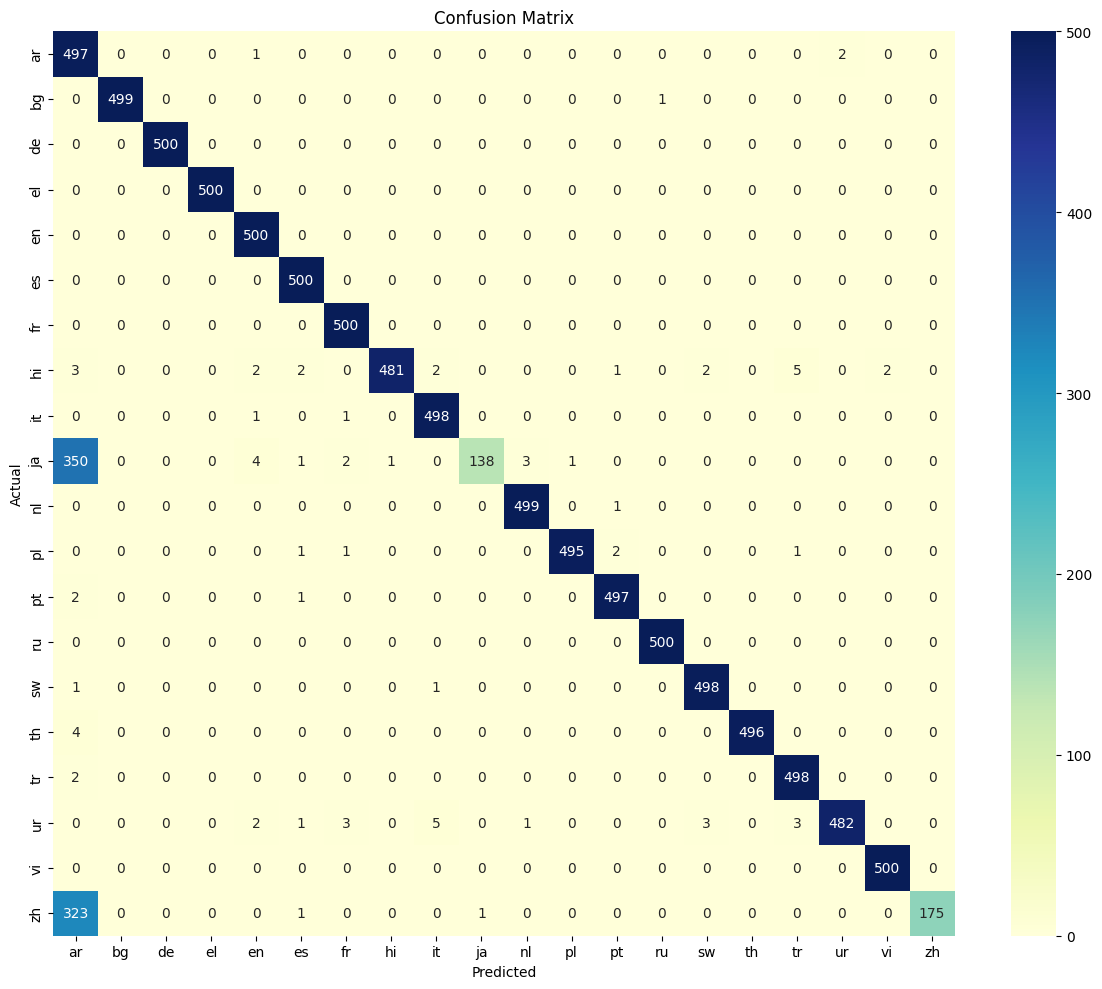

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict, labels=grid.classes_)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, xticklabels=grid.classes_, yticklabels=grid.classes_, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [119]:
from sklearn.metrics import accuracy_score
print("Accuracy score ",accuracy_score(y_predict,y_test))

Accuracy score  0.9253


In [121]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

          ar       0.42      0.99      0.59       500
          bg       1.00      1.00      1.00       500
          de       1.00      1.00      1.00       500
          el       1.00      1.00      1.00       500
          en       0.98      1.00      0.99       500
          es       0.99      1.00      0.99       500
          fr       0.99      1.00      0.99       500
          hi       1.00      0.96      0.98       500
          it       0.98      1.00      0.99       500
          ja       0.99      0.28      0.43       500
          nl       0.99      1.00      1.00       500
          pl       1.00      0.99      0.99       500
          pt       0.99      0.99      0.99       500
          ru       1.00      1.00      1.00       500
          sw       0.99      1.00      0.99       500
          th       1.00      0.99      1.00       500
          tr       0.98      1.00      0.99       500
          ur       1.00    

In [123]:
import pickle
# Save trained model
with open("language_detector_model.pkl", "wb") as model_file:
    pickle.dump(grid.best_estimator_, model_file)

# Save the TfidfVectorizer
with open("language_vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)

